In [1]:
from google.colab import files
files.upload()

Saving winequality.csv to winequality.csv


{'winequality.csv': b'"fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"\n7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5\n7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5\n7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5\n11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6\n7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5\n7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5\n7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5\n7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7\n7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7\n7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5\n6.7,0.58,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,5\n7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5\n5.6,0.615,0,1.6,0.089,16,59,0.9943,3.58,0.52,9.9,5\n7.8,0.61,0.29,1.6,0.114,9,29,0.9974,3.26,1.56,9.1,5\n8.9,0.62,0.18,3.8,0.176,52,145,0.9986,3.16,0.88,9.2,5\n8.9,0.62,0.19,3.9,0.17,5

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [99]:
df=pd.read_csv('winequality.csv')

In [100]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [101]:
df.shape

(1599, 12)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [103]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [104]:
df.shape

(1599, 12)

In [105]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

EXPLORATIVE DATA ANALYSIS

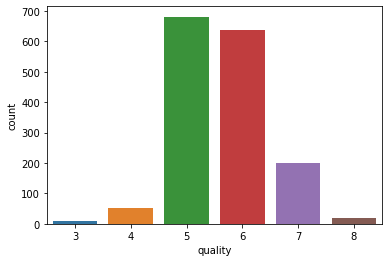

In [106]:
sns.countplot(x='quality',data=df)

In [107]:

reviews=[]
for i in df['quality']:
  if i <=6:
    reviews.append('0')
  else:
    reviews.append('1')

df['reviews']=reviews

In [108]:
df['reviews'].unique()

array(['0', '1'], dtype=object)

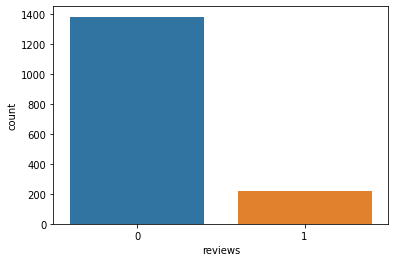

In [109]:
sns.countplot(x='reviews',data=df)

In [110]:
df=df.drop(columns='quality')

In [111]:
df['reviews']=pd.to_numeric(df['reviews'],errors='coerce')

<function matplotlib.pyplot.show>

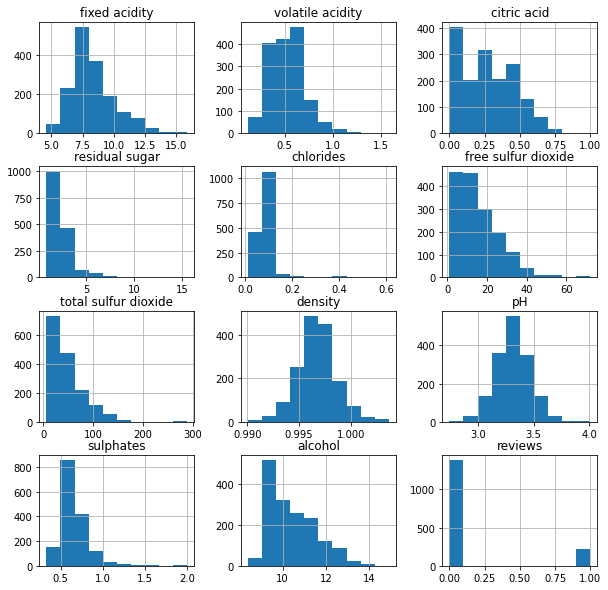

In [112]:
df.hist(figsize=(10,10))
plt.show

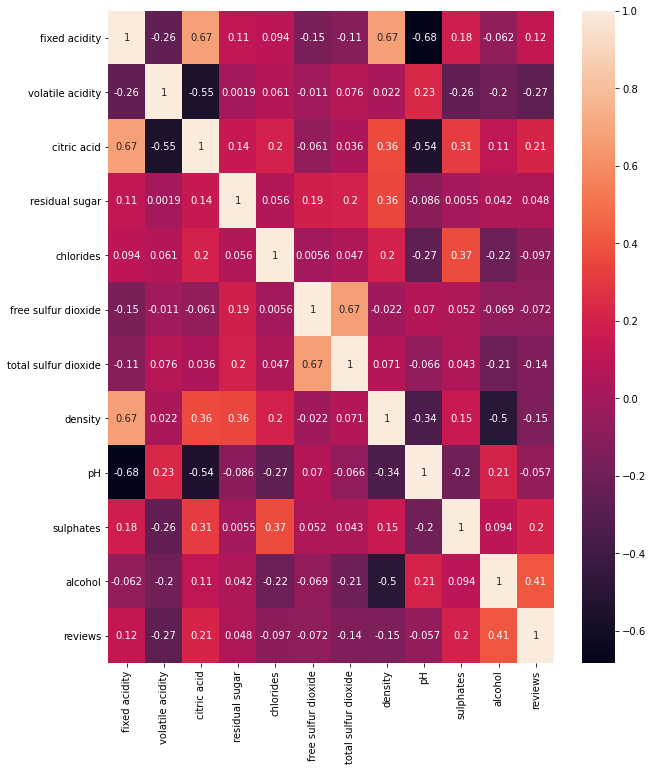

In [113]:
plt.subplots(figsize=(10,12))
sns.heatmap(df.corr(), annot=True)

In [114]:
X = df.drop(['reviews'],axis=1)
y=df['reviews']


In [115]:
x.shape,y.shape

((1597, 11), (1599,))

In [92]:
#from sklearn.preprocessing import StandardScaler
#X_features = X
#X=StandardScaler().fit_transform(X)



In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

Modeling, uSING DIFF ALGOGS

In [117]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier


In [120]:
M1=DecisionTreeClassifier(random_state=1)
M1.fit(X_train,y_train)
y_pred1 = M1.predict(X_test)

print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.96      0.93      0.94       355
           1       0.55      0.71      0.62        45

    accuracy                           0.90       400
   macro avg       0.76      0.82      0.78       400
weighted avg       0.92      0.90      0.91       400



MODEL 2 USING RANDOM FOREST


In [121]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.68      0.58      0.63        45

    accuracy                           0.92       400
   macro avg       0.82      0.77      0.79       400
weighted avg       0.92      0.92      0.92       400



USING ADABOSST


In [122]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.51      0.49      0.50        45

    accuracy                           0.89       400
   macro avg       0.72      0.71      0.72       400
weighted avg       0.89      0.89      0.89       400



In [123]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       355
           1       0.57      0.56      0.56        45

    accuracy                           0.90       400
   macro avg       0.76      0.75      0.75       400
weighted avg       0.90      0.90      0.90       400



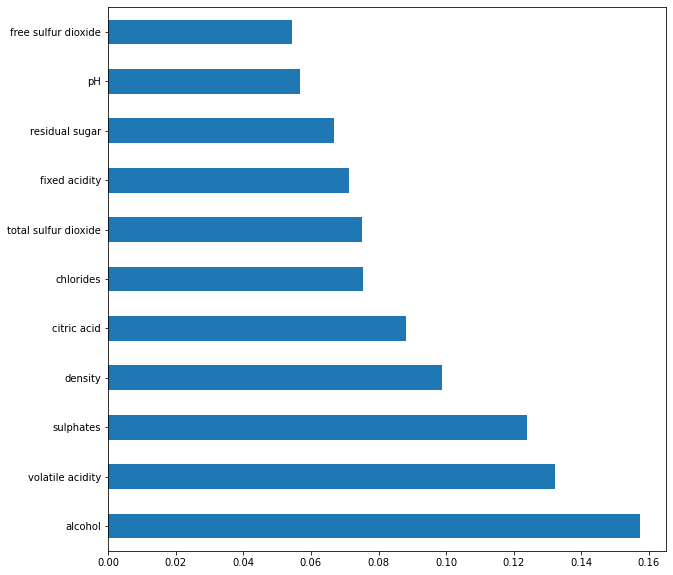

In [124]:
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

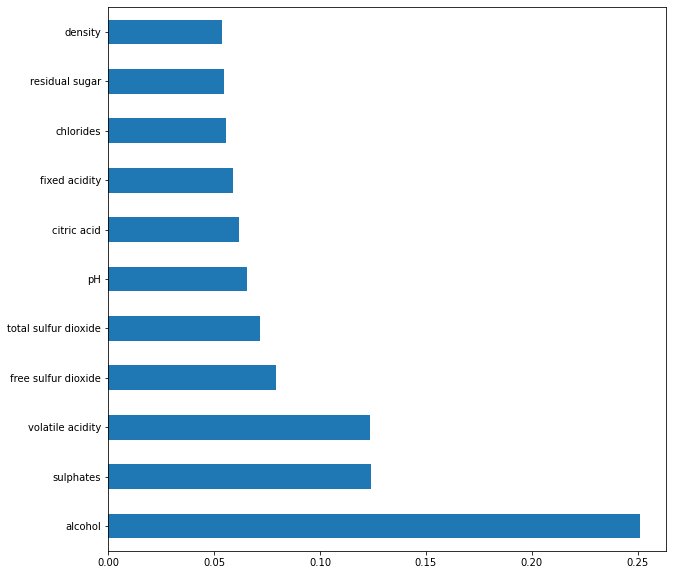

In [125]:
feat_importances = pd.Series(model5.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))